# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the city information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | luanda
Processing Record 7 of Set 1 | labrador city
Processing Record 8 of Set 1 | badger
Processing Record 9 of Set 1 | nouadhibou
Processing Record 10 of Set 1 | yermakovskoye
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | balabac
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | newman
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | gaspe
Processing Record 19 of Set 1 | labasa
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | machico
Processing Record 22 of Set 1 | olonkinbyen
Processing Record 23 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,17.11,92,100,13.87,SH,1733103707
1,papatowai,-46.5619,169.4708,16.87,61,100,3.91,NZ,1733103709
2,ribeira grande,38.5167,-28.7000,17.10,90,49,1.34,PT,1733103710
3,adamstown,-25.0660,-130.1015,23.28,77,86,6.18,PN,1733103685
4,tiksi,71.6872,128.8694,-24.87,100,70,1.92,RU,1733103683


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,17.11,92,100,13.87,SH,1733103707
1,papatowai,-46.5619,169.4708,16.87,61,100,3.91,NZ,1733103709
2,ribeira grande,38.5167,-28.7000,17.10,90,49,1.34,PT,1733103710
3,adamstown,-25.0660,-130.1015,23.28,77,86,6.18,PN,1733103685
4,tiksi,71.6872,128.8694,-24.87,100,70,1.92,RU,1733103683


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

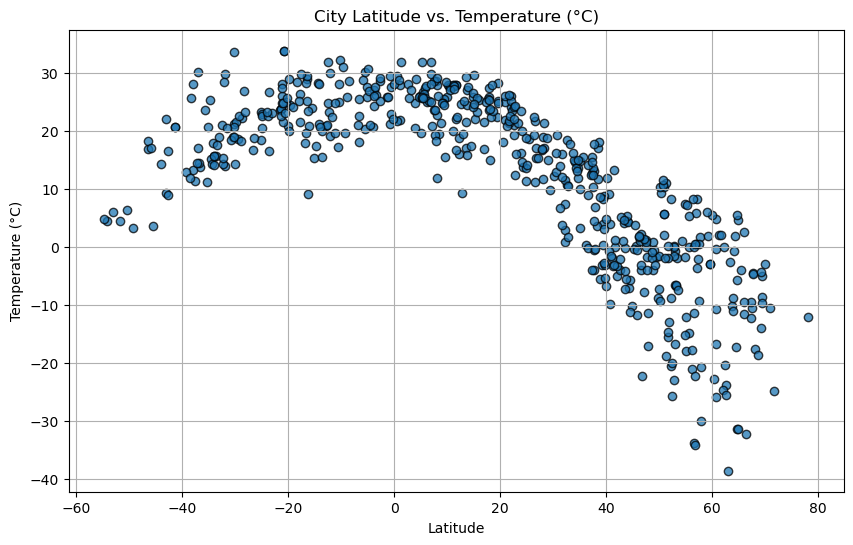

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

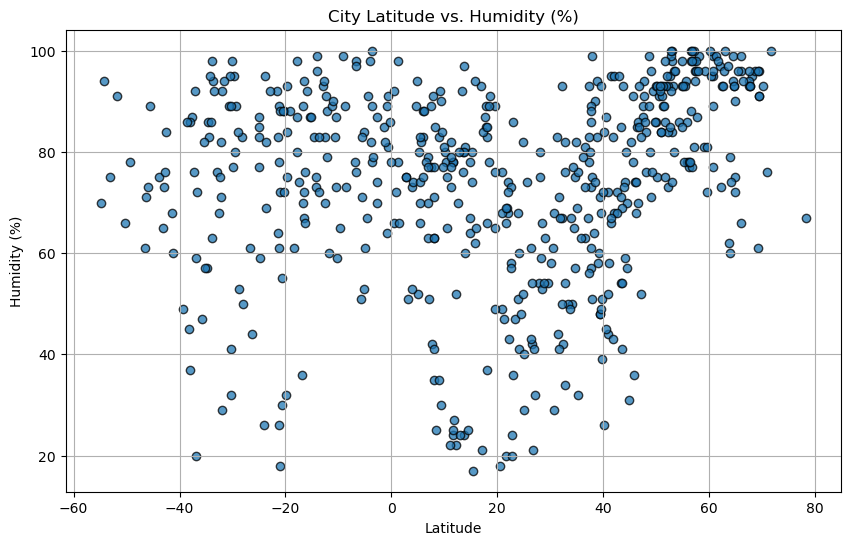

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

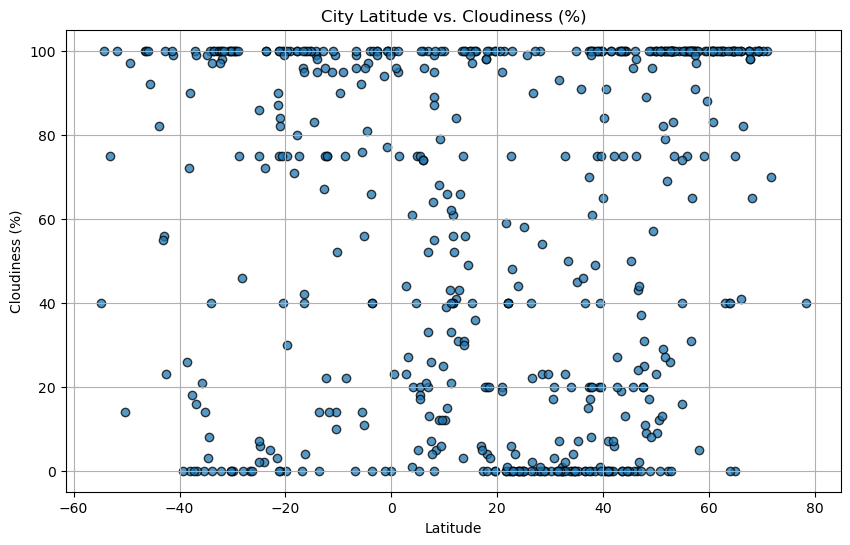

In [10]:
# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

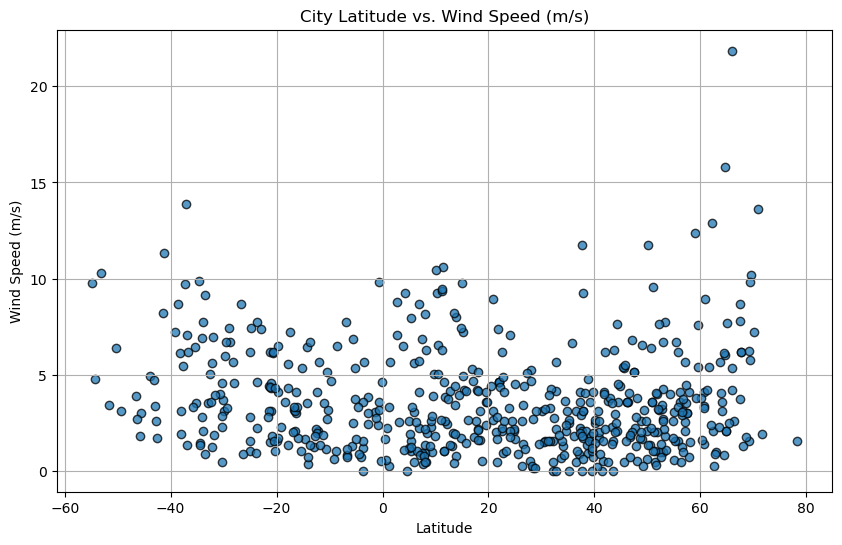

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemi):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Create regression line values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Save the figure
    plt.savefig(f"output_data/{hemi}_{title.replace(' ', '_')}.png")

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ribeira grande,38.5167,-28.7000,17.10,90,49,1.34,PT,1733103710
4,tiksi,71.6872,128.8694,-24.87,100,70,1.92,RU,1733103683
6,labrador city,52.9463,-66.9114,-6.57,84,100,6.69,CA,1733103715
7,badger,64.8000,-147.5333,-31.39,75,0,2.06,US,1733103716
8,nouadhibou,20.9310,-17.0347,21.99,49,95,3.09,MR,1733103717


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,17.11,92,100,13.87,SH,1733103707
1,papatowai,-46.5619,169.4708,16.87,61,100,3.91,NZ,1733103709
3,adamstown,-25.0660,-130.1015,23.28,77,86,6.18,PN,1733103685
5,luanda,-8.8368,13.2343,26.00,89,75,1.03,AO,1733103646
10,grytviken,-54.2811,-36.5092,4.57,94,100,4.75,GS,1733103697


###  Temperature vs. Latitude Linear Regression Plot

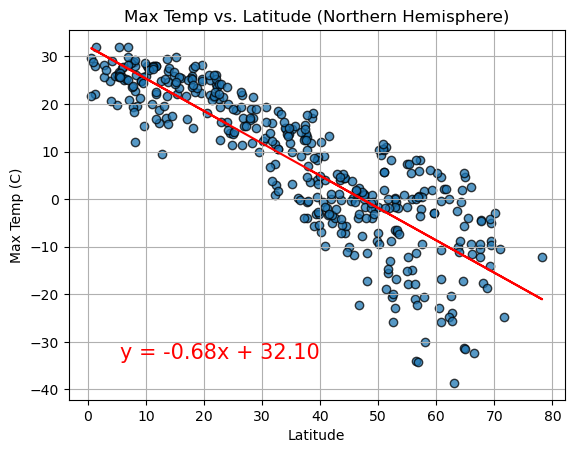

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Max Temp vs. Latitude (Northern Hemisphere)", 
                       "Latitude", "Max Temp (C)", "Northern_Hemisphere")

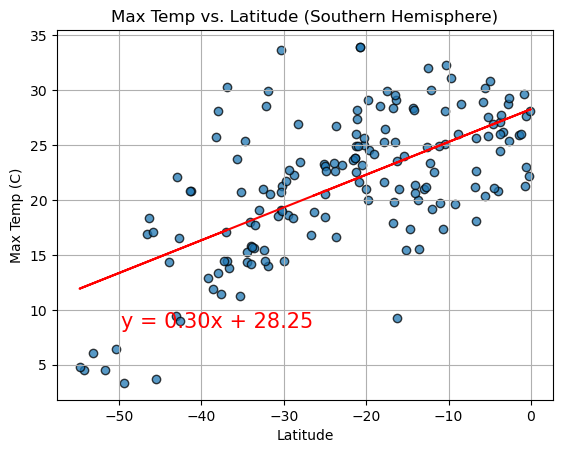

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Max Temp vs. Latitude (Southern Hemisphere)", 
                       "Latitude", "Max Temp (C)", "Southern_Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

### Humidity vs. Latitude Linear Regression Plot

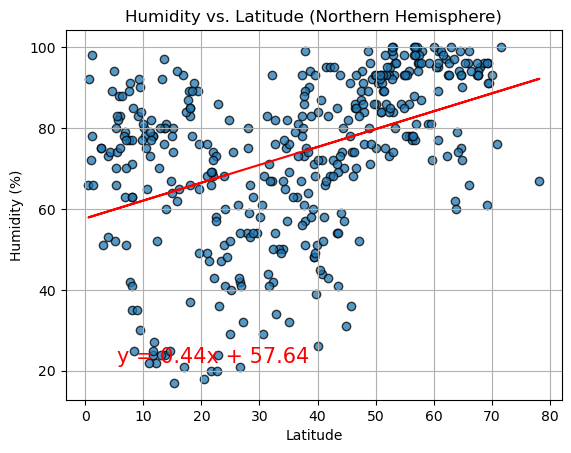

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Humidity vs. Latitude (Northern Hemisphere)", 
                       "Latitude", "Humidity (%)", "Northern_Hemisphere")

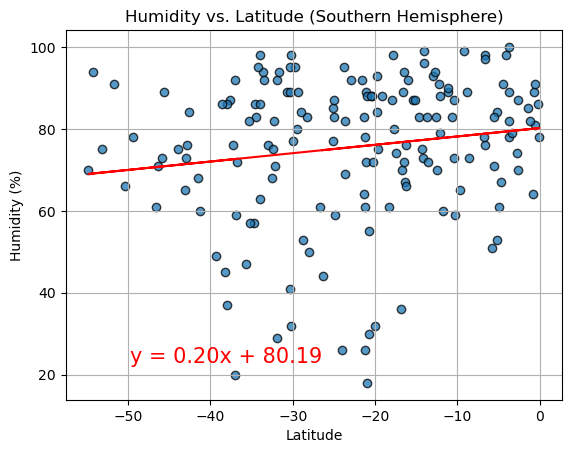

In [18]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Humidity vs. Latitude (Southern Hemisphere)", 
                       "Latitude", "Humidity (%)", "Southern_Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

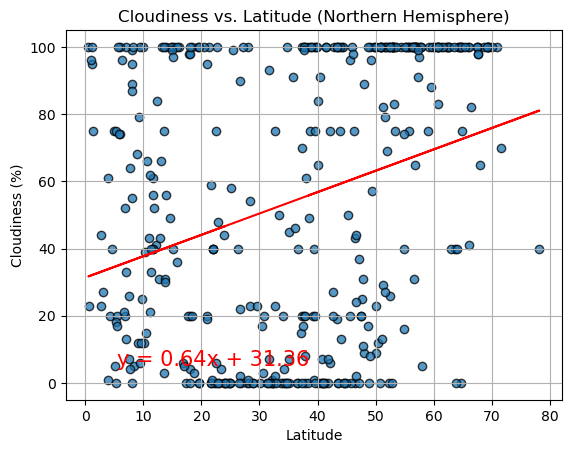

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Cloudiness vs. Latitude (Northern Hemisphere)", 
                       "Latitude", "Cloudiness (%)", "Northern_Hemisphere")

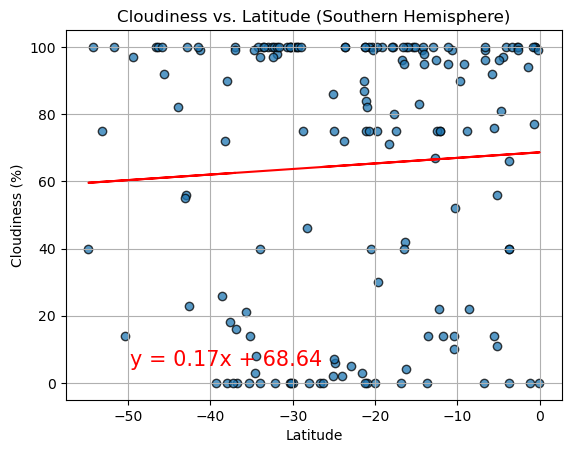

In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Cloudiness vs. Latitude (Southern Hemisphere)", 
                       "Latitude", "Cloudiness (%)", "Southern_Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

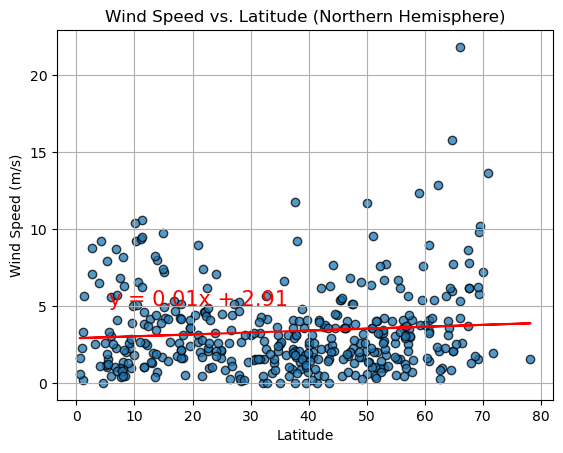

In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Wind Speed vs. Latitude (Northern Hemisphere)", 
                       "Latitude", "Wind Speed (m/s)", "Northern_Hemisphere")

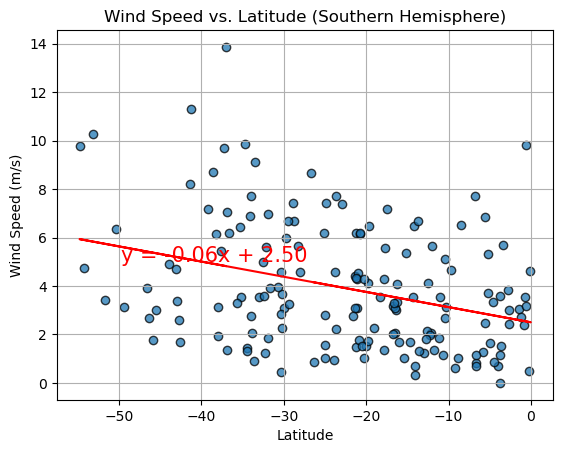

In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Wind Speed vs. Latitude (Southern Hemisphere)", 
                       "Latitude", "Wind Speed (m/s)", "Southern_Hemisphere")

**Discussion about the linear relationship:** The linear regression analysis provided insights into how some weather parameters correlate with latitude. Temperature showed a clear and consistent relationship with latitude, while other factors like humidity, cloudiness, and wind speed were more influenced by local conditions and showed weaker correlations. Understanding these relationships helps in predicting and explaining climatic patterns across different regions of the world.